# Basic Data Analysis 

PM10 is an air pollutant that include inhalable particles, with diameters that are generally 10 micrometer and smaller. 

In this project there are 19 different CSV files that are named with different cities of Poland. In every dataset include two different PM10 values. The one is monitoring value, others model value. 

The aim of this project is to make basic data analysis with using numpy and pandas libraries and also visualize the data with time series and hexbin plot graphs. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting
import datetime
import os
import glob

In [9]:
# data input 
# in CSV files dataset sepereted by ; symbol and the dataset not include different columns 
# so we need to seperete each column and set one column as an index.
# the second column of data will be index 
# it is necessery that seperate date from hour with help of parse_date

df = pd.read_csv("MzWarAlNiepo.csv", sep=';',index_col=2, parse_dates=True)  
df.head(10)

,unixdate,station_code,model_value,monitoring_value
to_timestamp,,,,
2020-03-06 04:00:00+01:00,1583463600,MzWarAlNiepo,18.415,39.51
2020-03-06 03:00:00+01:00,1583460000,MzWarAlNiepo,20.986,43.60
2020-03-06 02:00:00+01:00,1583456400,MzWarAlNiepo,22.377,41.21
2020-03-06 01:00:00+01:00,1583452800,MzWarAlNiepo,23.288,39.28
2020-03-06 00:00:00+01:00,1583449200,MzWarAlNiepo,24.686,40.77
2020-03-05 23:00:00+01:00,1583445600,MzWarAlNiepo,25.961,41.00
2020-03-05 22:00:00+01:00,1583442000,MzWarAlNiepo,28.971,46.52
2020-03-05 21:00:00+01:00,1583438400,MzWarAlNiepo,33.064,48.93
2020-03-05 20:00:00+01:00,1583434800,MzWarAlNiepo,33.095,45.88


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7826 entries, 2020-03-06 04:00:00+01:00 to 2019-03-07 14:00:00+01:00
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unixdate          7826 non-null   int64  
 1   station_code      7826 non-null   object 
 2   model_value       7826 non-null   float64
 3   monitoring_value  7826 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 305.7+ KB


- features 
 - unix date: the date of observation
 - station code: the station code number
 - model value: PM10 predicted 
 - monitoring value: PM10 observed value

In [12]:
df.describe()

,unixdate,model_value,monitoring_value
count,7.826000e+03,7826.000000,7826.000000
mean,1.568146e+09,26.478691,34.856865
std,9.368540e+06,15.947212,18.680718
min,1.551964e+09,4.158000,3.650000
25%,1.559114e+09,15.903000,22.480000
50%,1.568281e+09,21.180500,31.305000
75%,1.576335e+09,31.472500,43.185000
max,1.583464e+09,121.441000,254.270000


In [13]:
df.dtypes

unixdate              int64
station_code         object
model_value         float64
monitoring_value    float64
dtype: object

In [17]:
df.isnull().sum() # there is any of NaN value 

unixdate            0
station_code        0
model_value         0
monitoring_value    0
dtype: int64

In [19]:
# Drop null values for each coloumn containing null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7826 entries, 2020-03-06 04:00:00+01:00 to 2019-03-07 14:00:00+01:00
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unixdate          7826 non-null   int64  
 1   station_code      7826 non-null   object 
 2   model_value       7826 non-null   float64
 3   monitoring_value  7826 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 305.7+ KB


In [20]:
# to replace all the zero value in coloumn with mean value.
df['model_value']=df['model_value'].replace(0,df['model_value'].mean())
df['monitoring_value']=df['monitoring_value'].replace(0,df['monitoring_value'].mean())


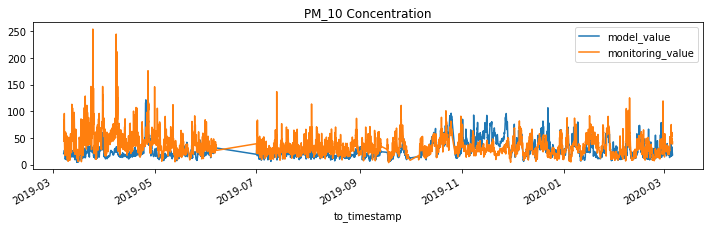

In [21]:
df.plot(y= ["model_value","monitoring_value"], figsize=(12, 3), title = "PM_10 Concentration")

plt.savefig('time_series.png') 

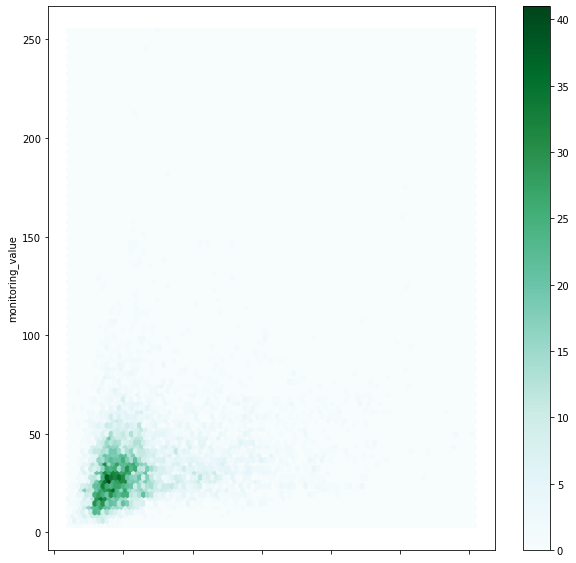

In [27]:
ax = df.plot.hexbin(x='model_value', y='monitoring_value', gridsize=100, figsize=(10, 10))
plt.savefig('hexbin_style_ScatterPlot.png') 

In [28]:
df.corr(method="pearson")

,unixdate,model_value,monitoring_value
unixdate,1.000000,0.260639,-0.241511
model_value,0.260639,1.000000,0.242016
monitoring_value,-0.241511,0.242016,1.000000


Up to now it is just for one spesific place data analysis. Let's write an automatic program that all files creates and time series and hexbin plot with the title of its location

In [29]:
path = r'2019'
files = glob.glob(path + "/*.csv")
print(files)

['2019\\DsDuszniMOB.csv', '2019\\DsJelGorOgin.csv', '2019\\DsKlodzSzkol.csv', '2019\\MpKrakBujaka.csv', '2019\\MpKrakBulwar.csv', '2019\\MpKrakDietla.csv', '2019\\MzWarAlNiepo.csv', '2019\\MzWarKondrat.csv', '2019\\MzWarWokalna.csv', '2019\\OpOlesSlowac.csv', '2019\\PdBorsukowiz.csv', '2019\\PdLomSikorsk.csv', '2019\\PkRymZdrPark.csv', '2019\\PmLebMalcz16.csv', '2019\\SkKielTargow.csv', '2019\\SkNowiParkow.csv', '2019\\SkStaraZlota.csv', '2019\\SlGliwicMewy.csv', '2019\\SlRybniBorki.csv']


In [30]:
fig_name = '{}{}'.format(files, ".png")
Title = "PM10 Concentration at {}".format(files)
count=0

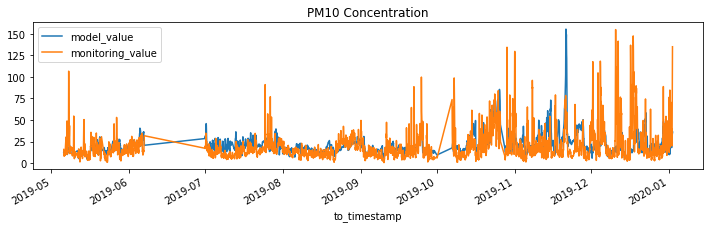

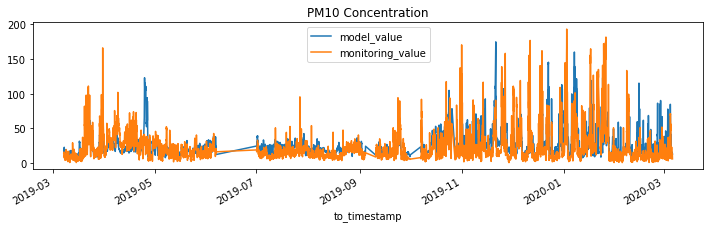

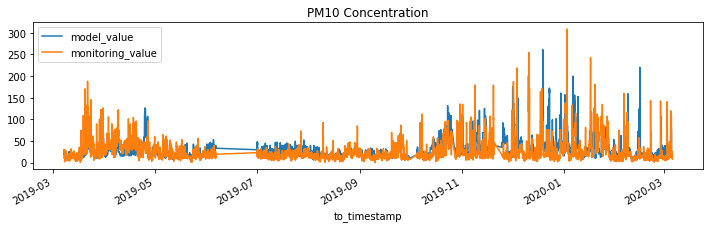

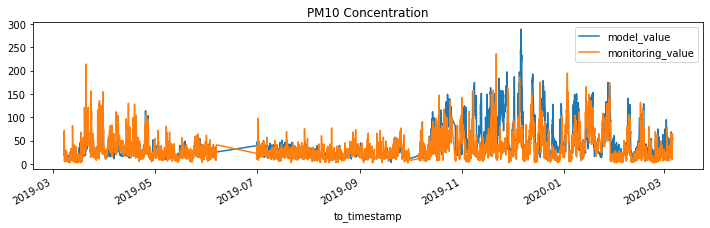

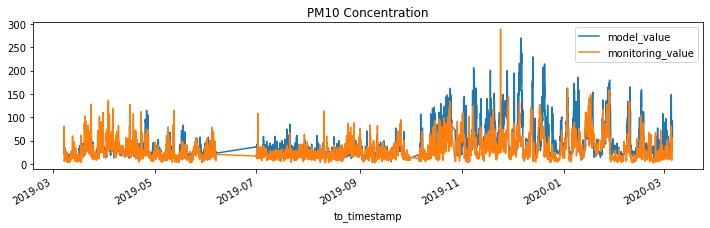

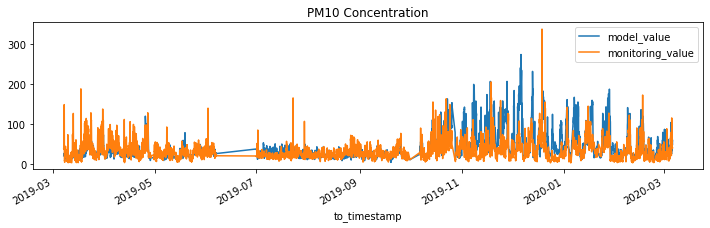

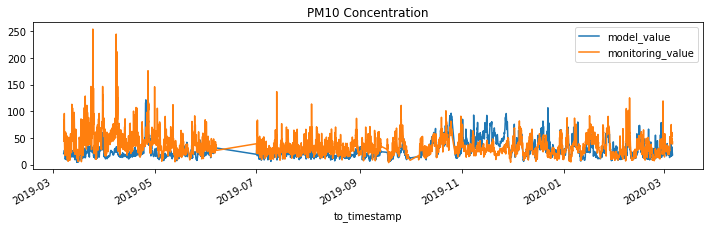

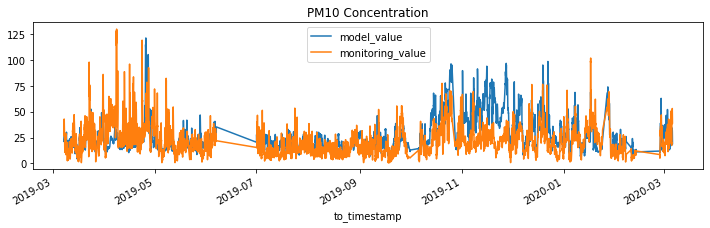

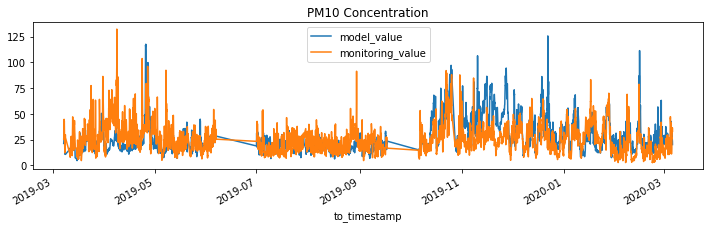

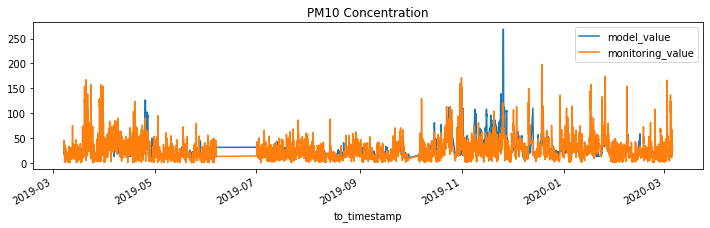

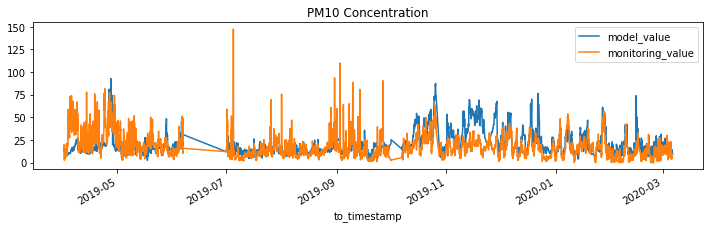

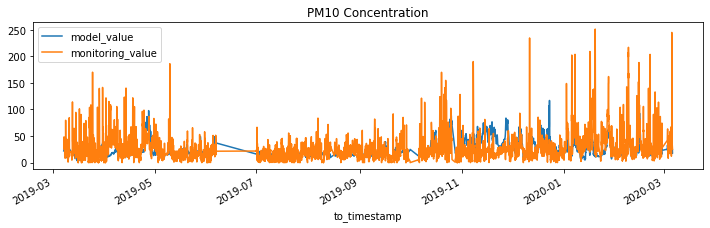

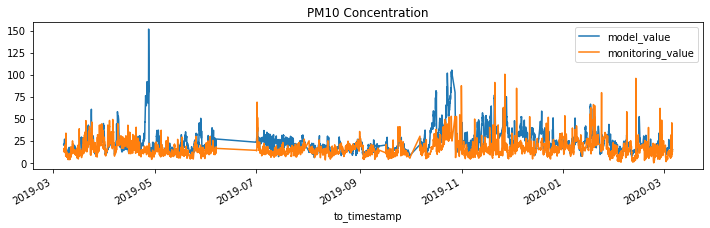

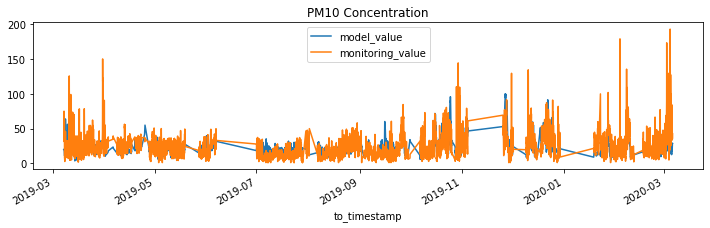

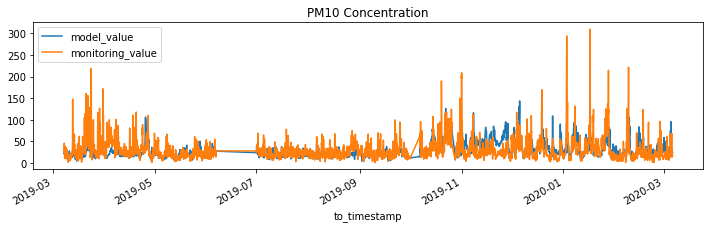

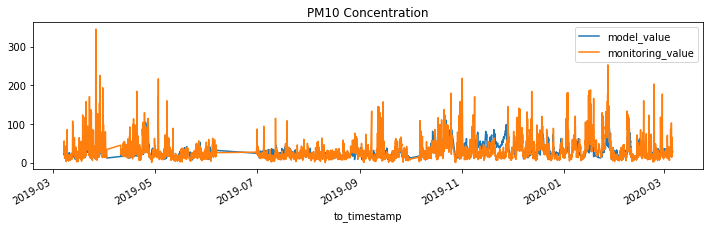

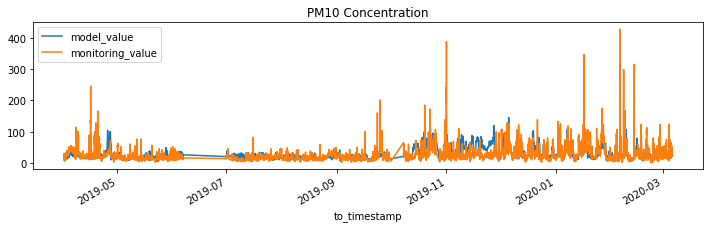

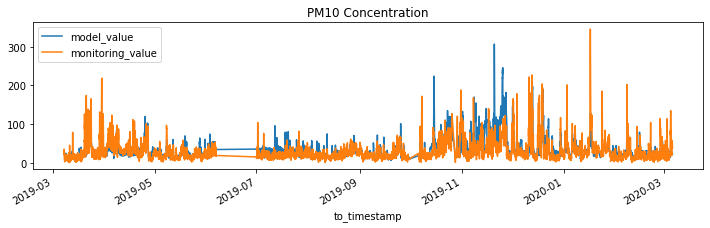

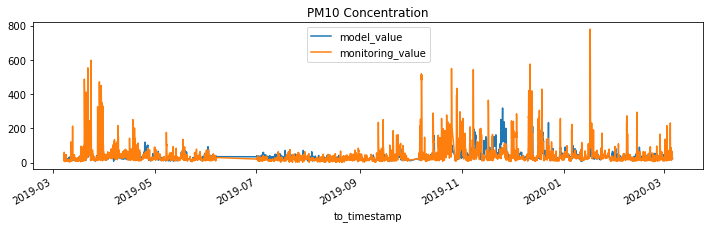

In [31]:
for file_path in files:
    df = pd.read_csv(file_path, sep=';', index_col=2, parse_dates=True)
    df.head()
    df[3:]
    df.replace(-999, np.nan, inplace=True)

    df.plot(y=['model_value', 'monitoring_value'], figsize=(12, 3), title='PM10 Concentration')

    plt.savefig(file_path + ".pdf")

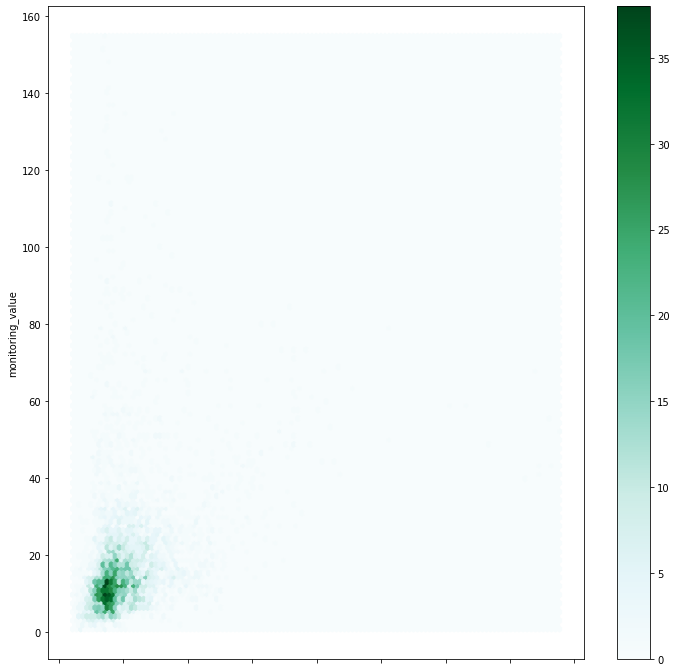

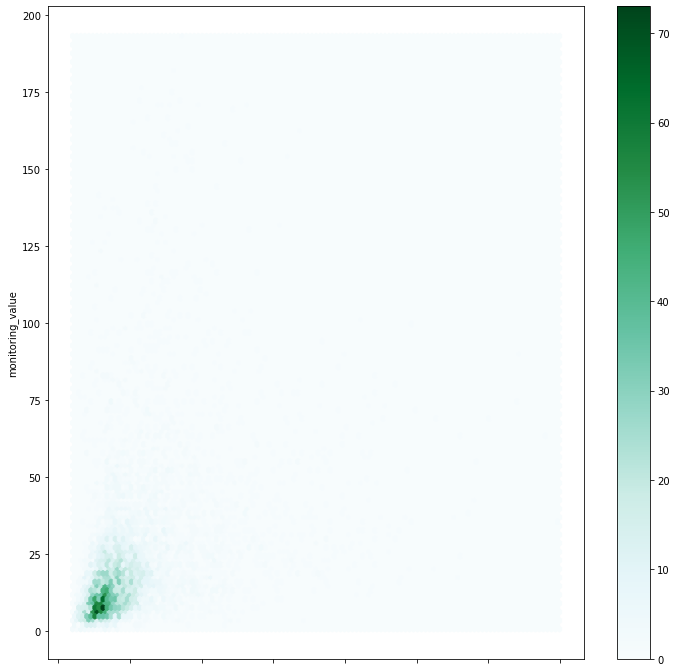

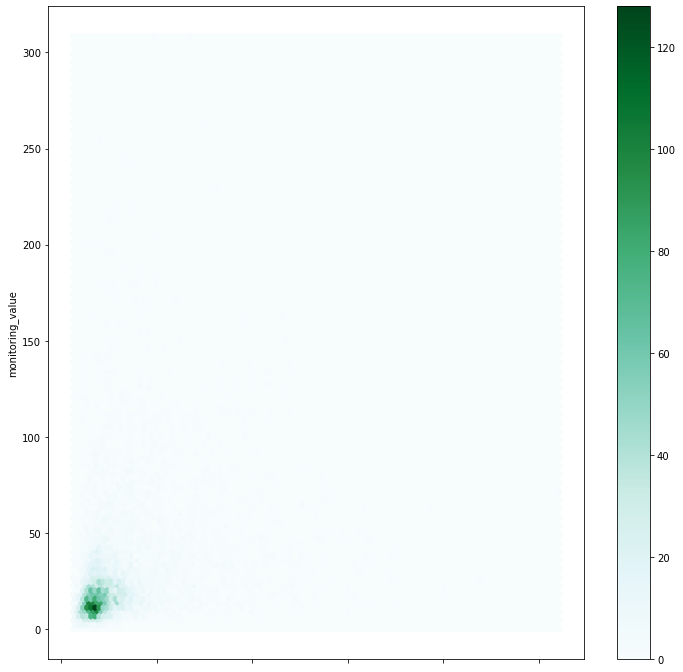

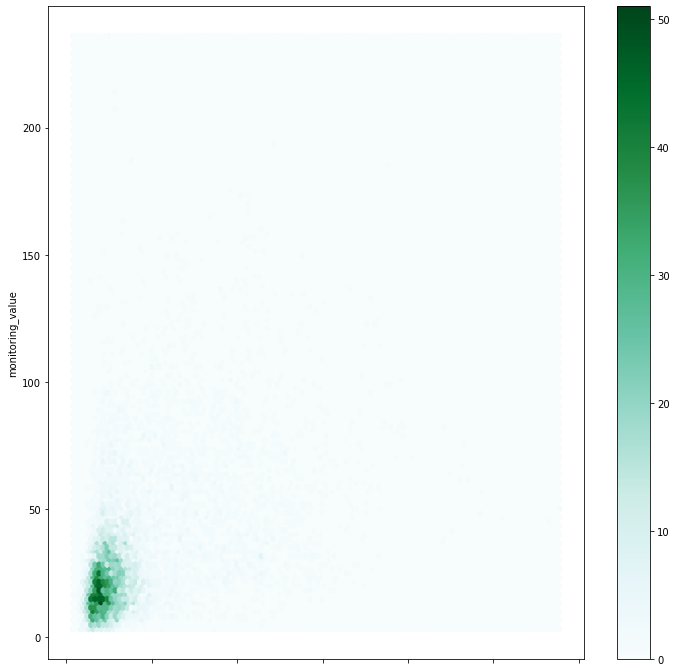

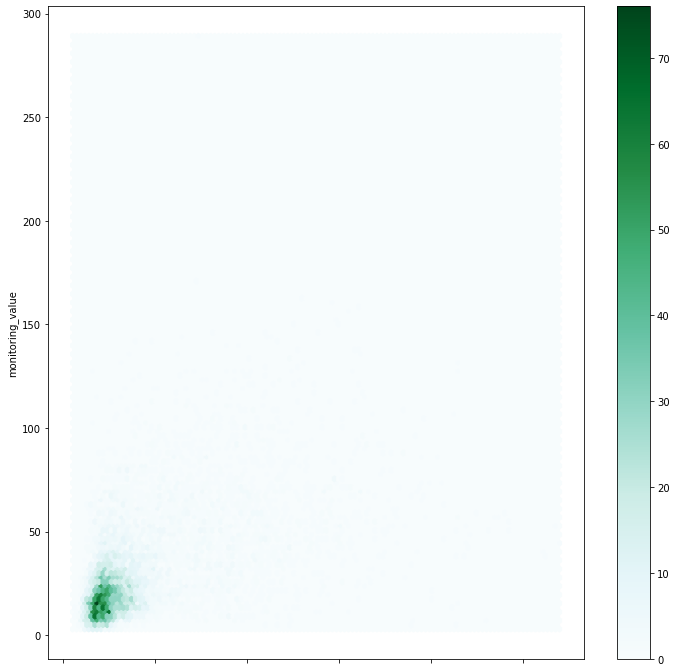

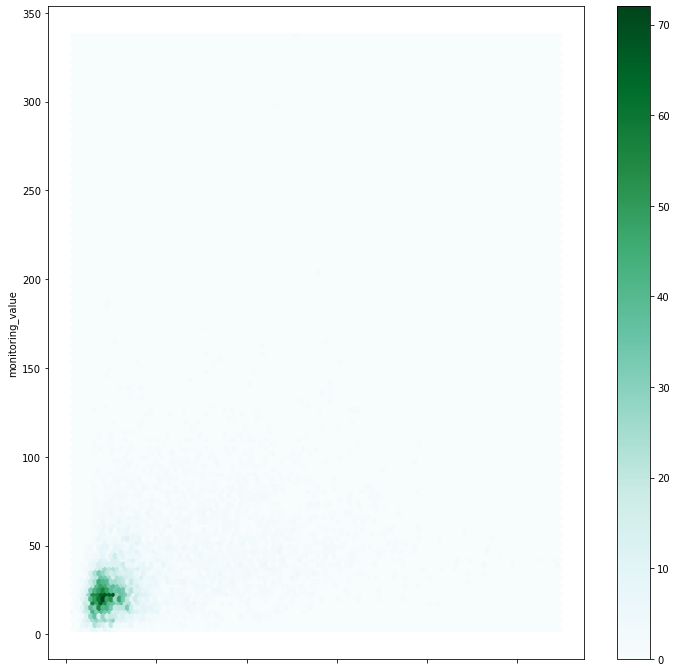

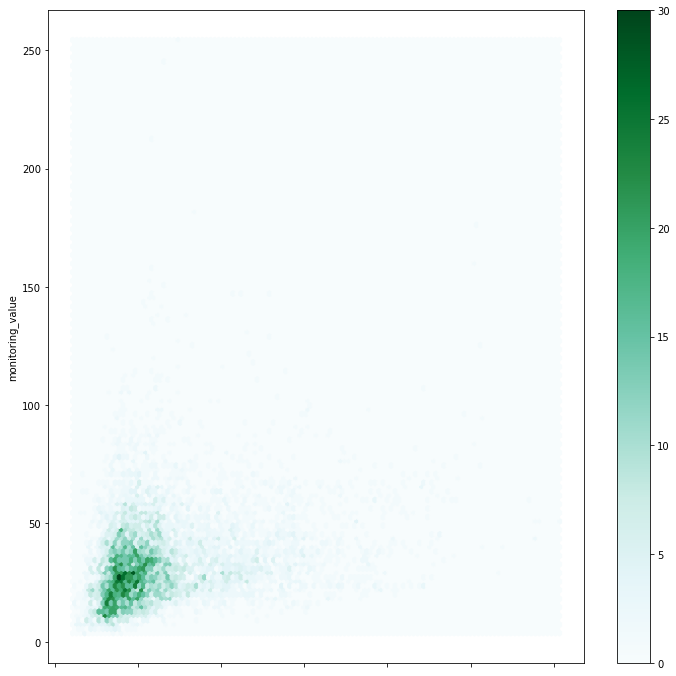

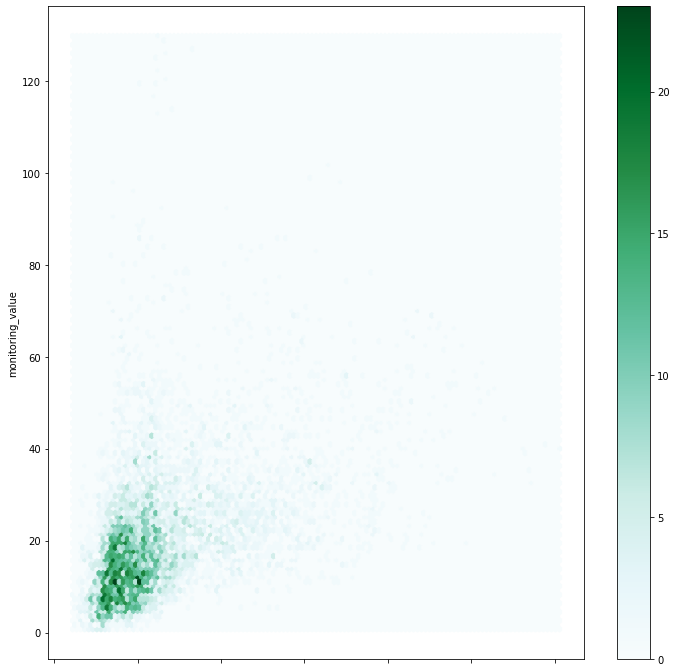

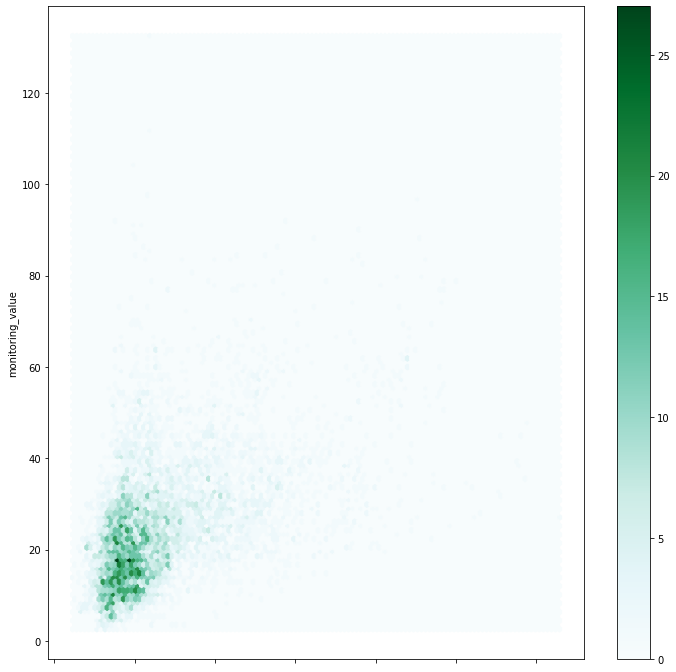

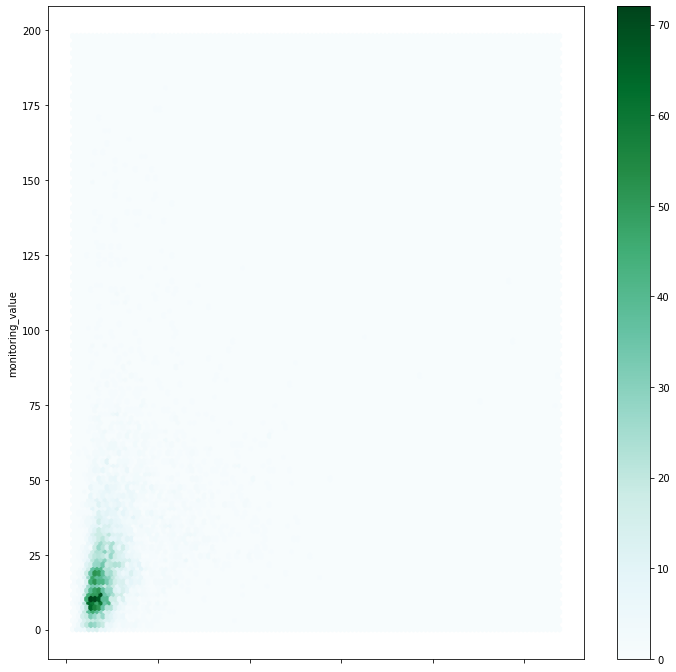

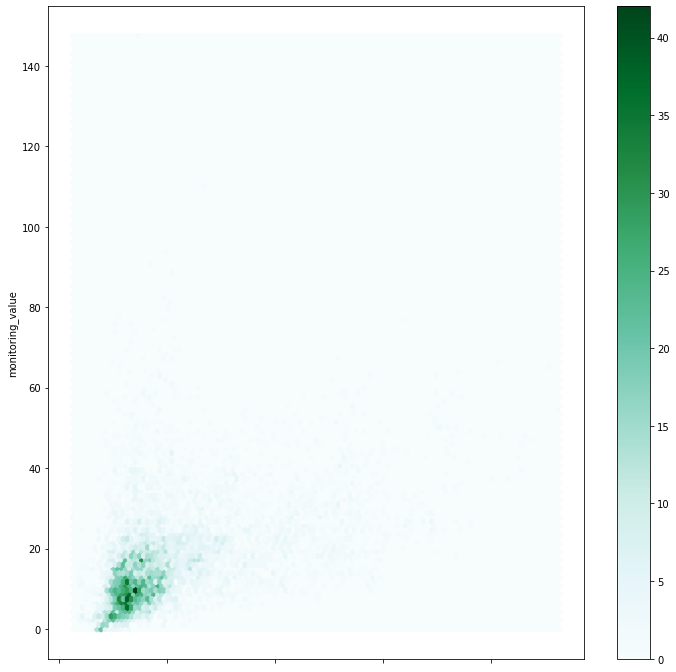

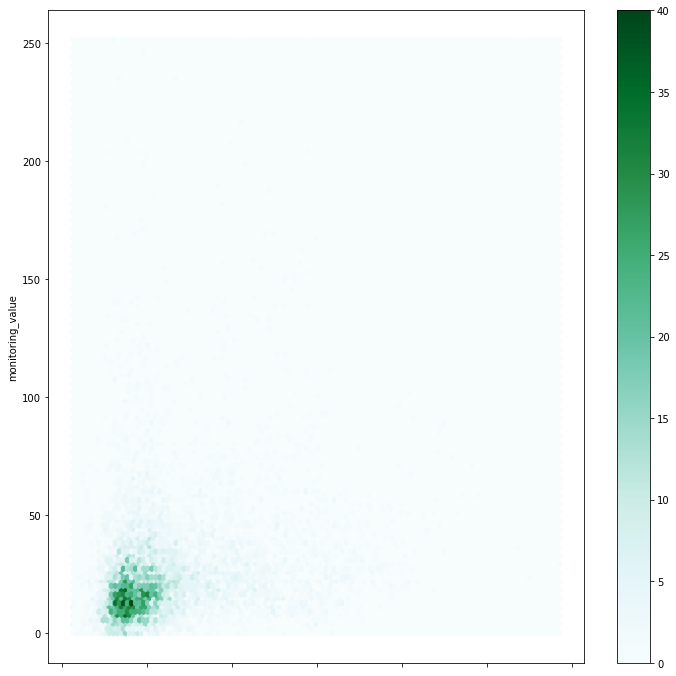

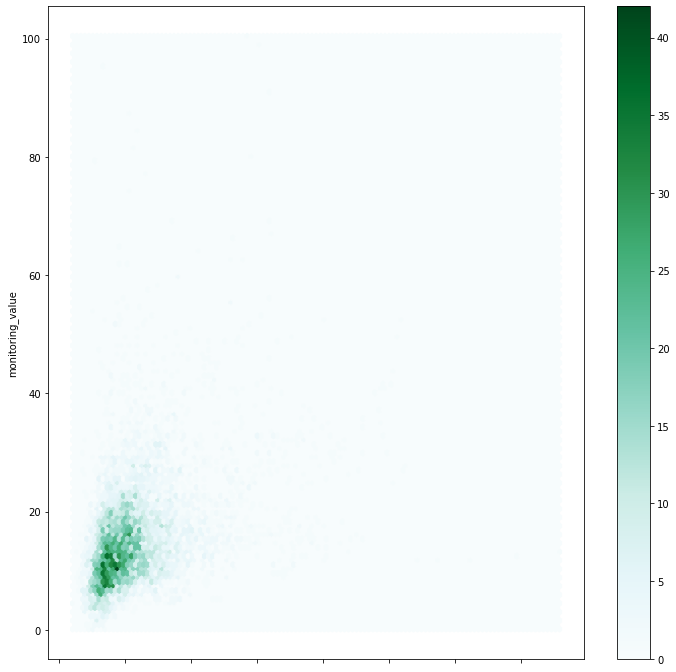

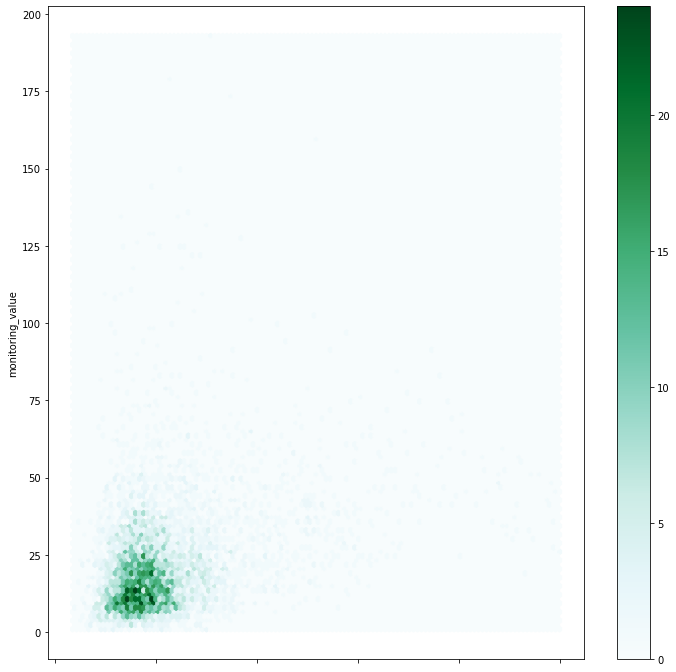

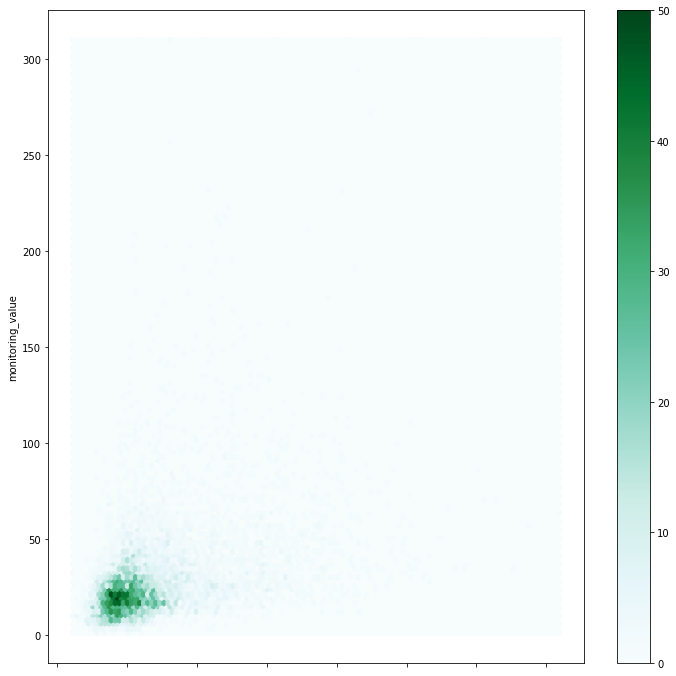

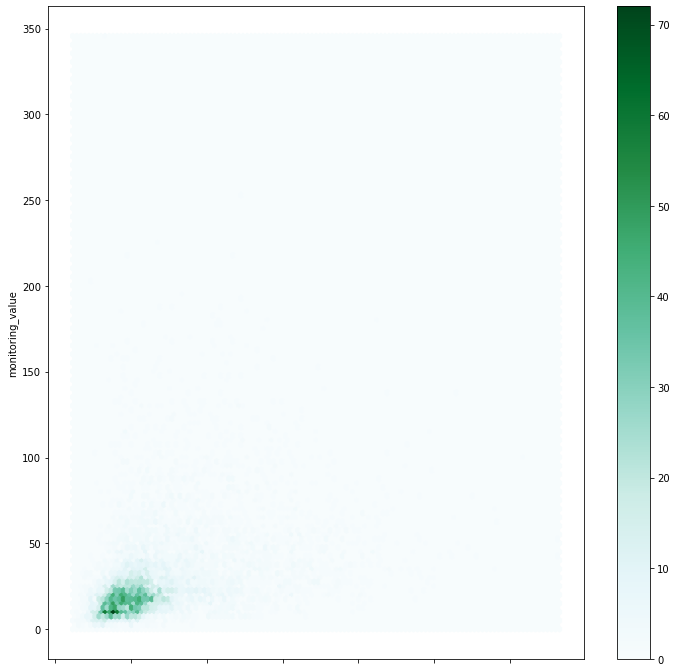

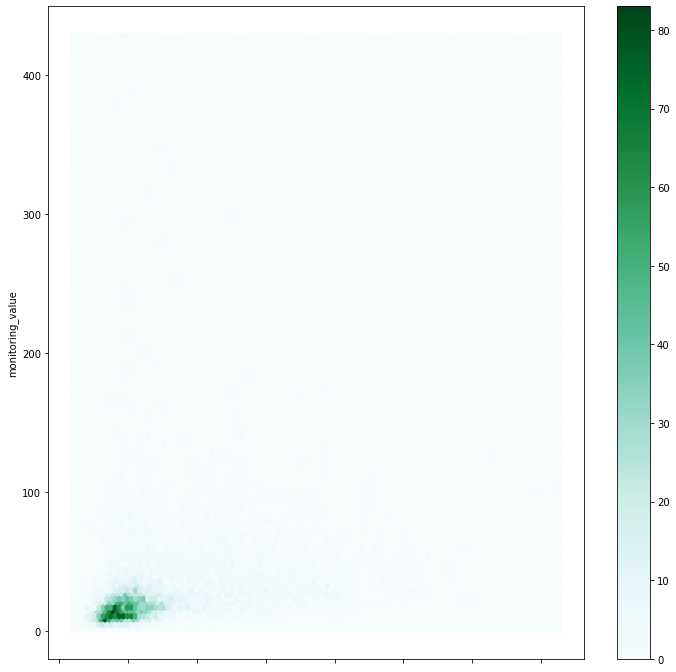

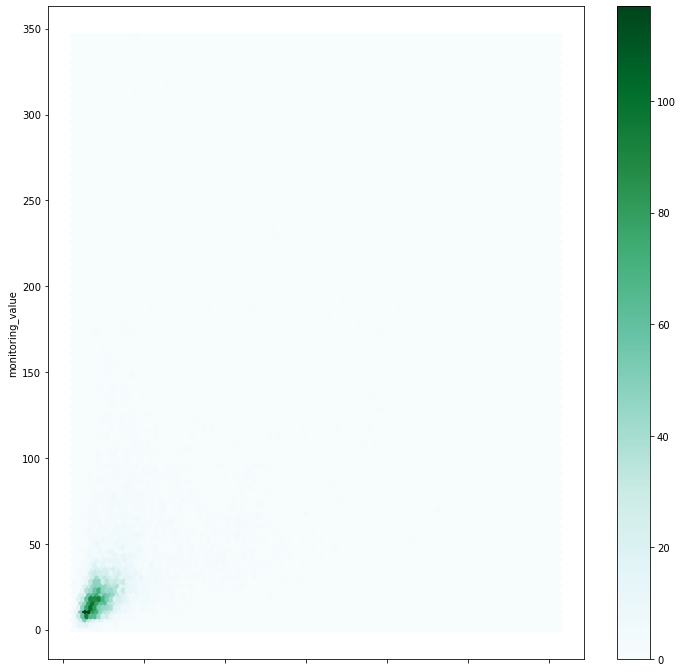

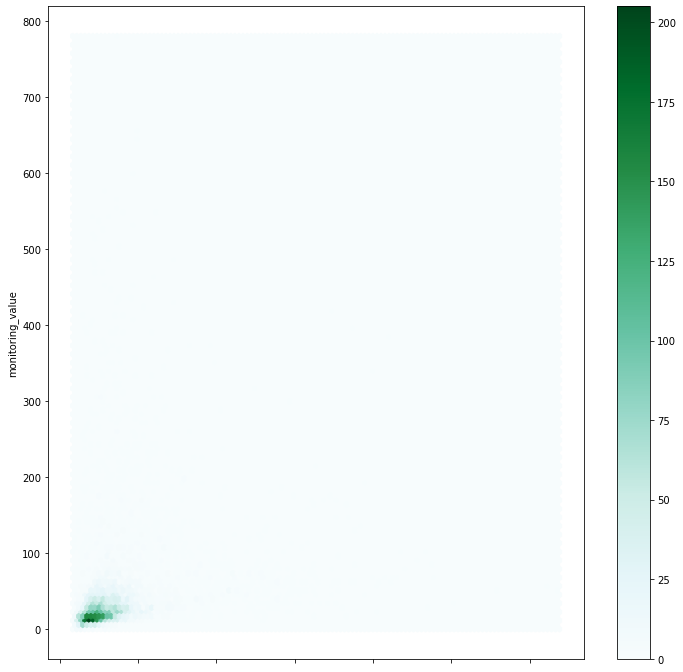

In [32]:
fig_name = '{}{}'.format(files, ".png")
Title = "PM10 Concentration monitoring at {}".format(files)
count=0
for file_path in files:
    df = pd.read_csv(file_path, sep=';', index_col=2, parse_dates=True)
    df.head()
    df[3:]
    df.replace(-999, np.nan, inplace=True)
    df.plot = df.plot.hexbin(x='model_value', y='monitoring_value', gridsize=120, figsize=(12, 12))
    plt.savefig(file_path + ".png")